# Loan Prediction Problem

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from statistics import mean
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler

%matplotlib inline

## **Data Exploration**

In [4]:
# Read input train data
df = pd.read_csv('train_data.csv')

In [5]:
# Display first rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Dataframe shape
df.shape

(614, 13)

In [7]:
# Find the datatypes and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## **Data Cleaning and Preprocessing**

In [9]:
# Find empty values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Find the percentage of missing data
for i in df.columns:
    percentage_missing_column = df[i].isnull().sum()/df.shape[0]
    print(f"Percentage of missing values in {i}: {round(percentage_missing_column*100, 2)}")

Percentage of missing values in Loan_ID: 0.0
Percentage of missing values in Gender: 2.12
Percentage of missing values in Married: 0.49
Percentage of missing values in Dependents: 2.44
Percentage of missing values in Education: 0.0
Percentage of missing values in Self_Employed: 5.21
Percentage of missing values in ApplicantIncome: 0.0
Percentage of missing values in CoapplicantIncome: 0.0
Percentage of missing values in LoanAmount: 3.58
Percentage of missing values in Loan_Amount_Term: 2.28
Percentage of missing values in Credit_History: 8.14
Percentage of missing values in Property_Area: 0.0
Percentage of missing values in Loan_Status: 0.0


In [11]:
# Fill missing values
for i in df.columns:
    if df[i].isnull().sum()>0:
        df[i].fillna(df[i].mode()[0], inplace=True)

C:\Users\makut\AppData\Local\Temp\ipykernel_20404\337479777.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


In [12]:
# Find empty values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Users\makut\AppData\Local\Temp\ipykernel_20404\1549068040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(df, x='Loan_Status', palette='coolwarm')


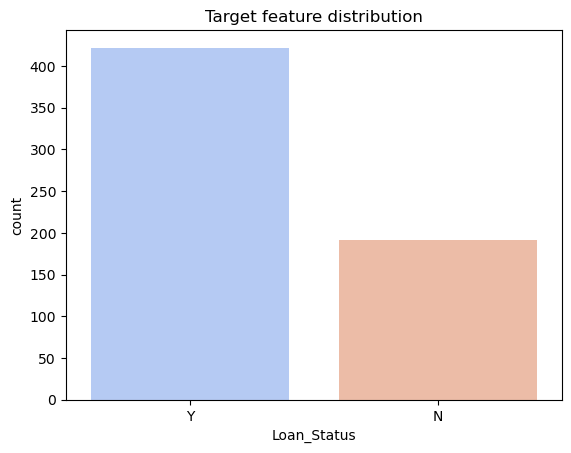

In [13]:
# Verify count for target feature
sb.countplot(df, x='Loan_Status', palette='coolwarm')
plt.title('Target feature distribution')
plt.xticks()
plt.show()

### Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

# label encoder
le = LabelEncoder()

# Perform label encoding in categorical
for i in df.select_dtypes(include='object'):    
    df[i] = le.fit_transform(df[i])

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### Target and independent variables

In [17]:
# Identify the target and independent variables
X = df.drop('Loan_Status', axis=1) # other independant features
Y = df['Loan_Status'] # target feature

### Split data

In [19]:
from sklearn.model_selection import train_test_split

#Split the data into train and test set 80/20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(f"Size of training data: {X_train.shape[0]}")
print(f"Size of test data: {X_test.shape[0]}")

Size of training data: 491
Size of test data: 123


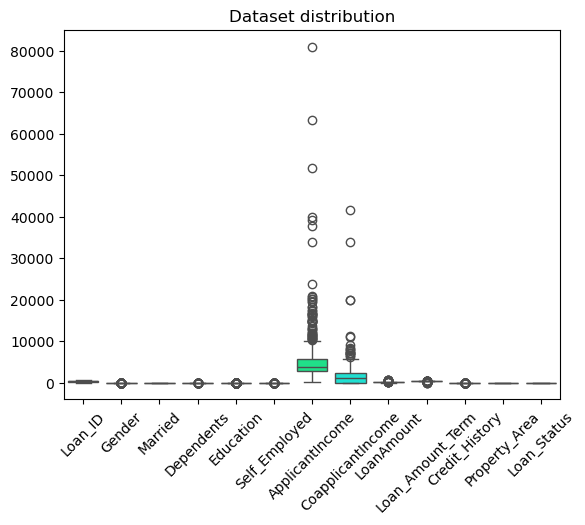

In [20]:
# Visualize the box plot for each column
sb.boxplot(data=df, palette='gist_rainbow')
plt.title('Dataset distribution')
plt.xticks(rotation=45)
plt.show()

### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

# Perform Standard Scaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

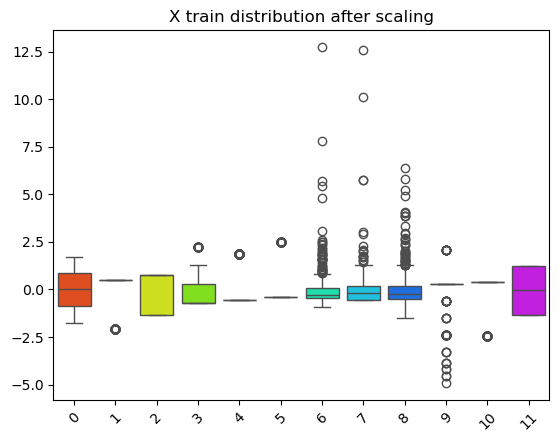

In [23]:
# Visualize the box plot after scaling for each column
sb.boxplot(data=X_train, palette='gist_rainbow')
plt.title('X train distribution after scaling')
plt.xticks(rotation=45)
plt.show()

## **ML algorithms**

### Decision Tree

In [26]:
# Decision tree object
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [27]:
from sklearn import metrics

# Predict values
Y_pred = dt_clf.predict(X_test)

# Decision Tree accuracy
dt_accuracy = metrics.accuracy_score(Y_pred, Y_test)

print(f"Accuracy for Decision Tree Classifier: {dt_accuracy:.4f}")

Accuracy for Decision Tree Classifier: 0.7154


In [28]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
conf_matrix

array([[23, 20],
       [15, 65]], dtype=int64)

In [29]:
# Classification Report
target_names = ['Loan approved', 'Loan not approved']
print(classification_report(Y_test, Y_pred, target_names=target_names))

                   precision    recall  f1-score   support

    Loan approved       0.61      0.53      0.57        43
Loan not approved       0.76      0.81      0.79        80

         accuracy                           0.72       123
        macro avg       0.68      0.67      0.68       123
     weighted avg       0.71      0.72      0.71       123



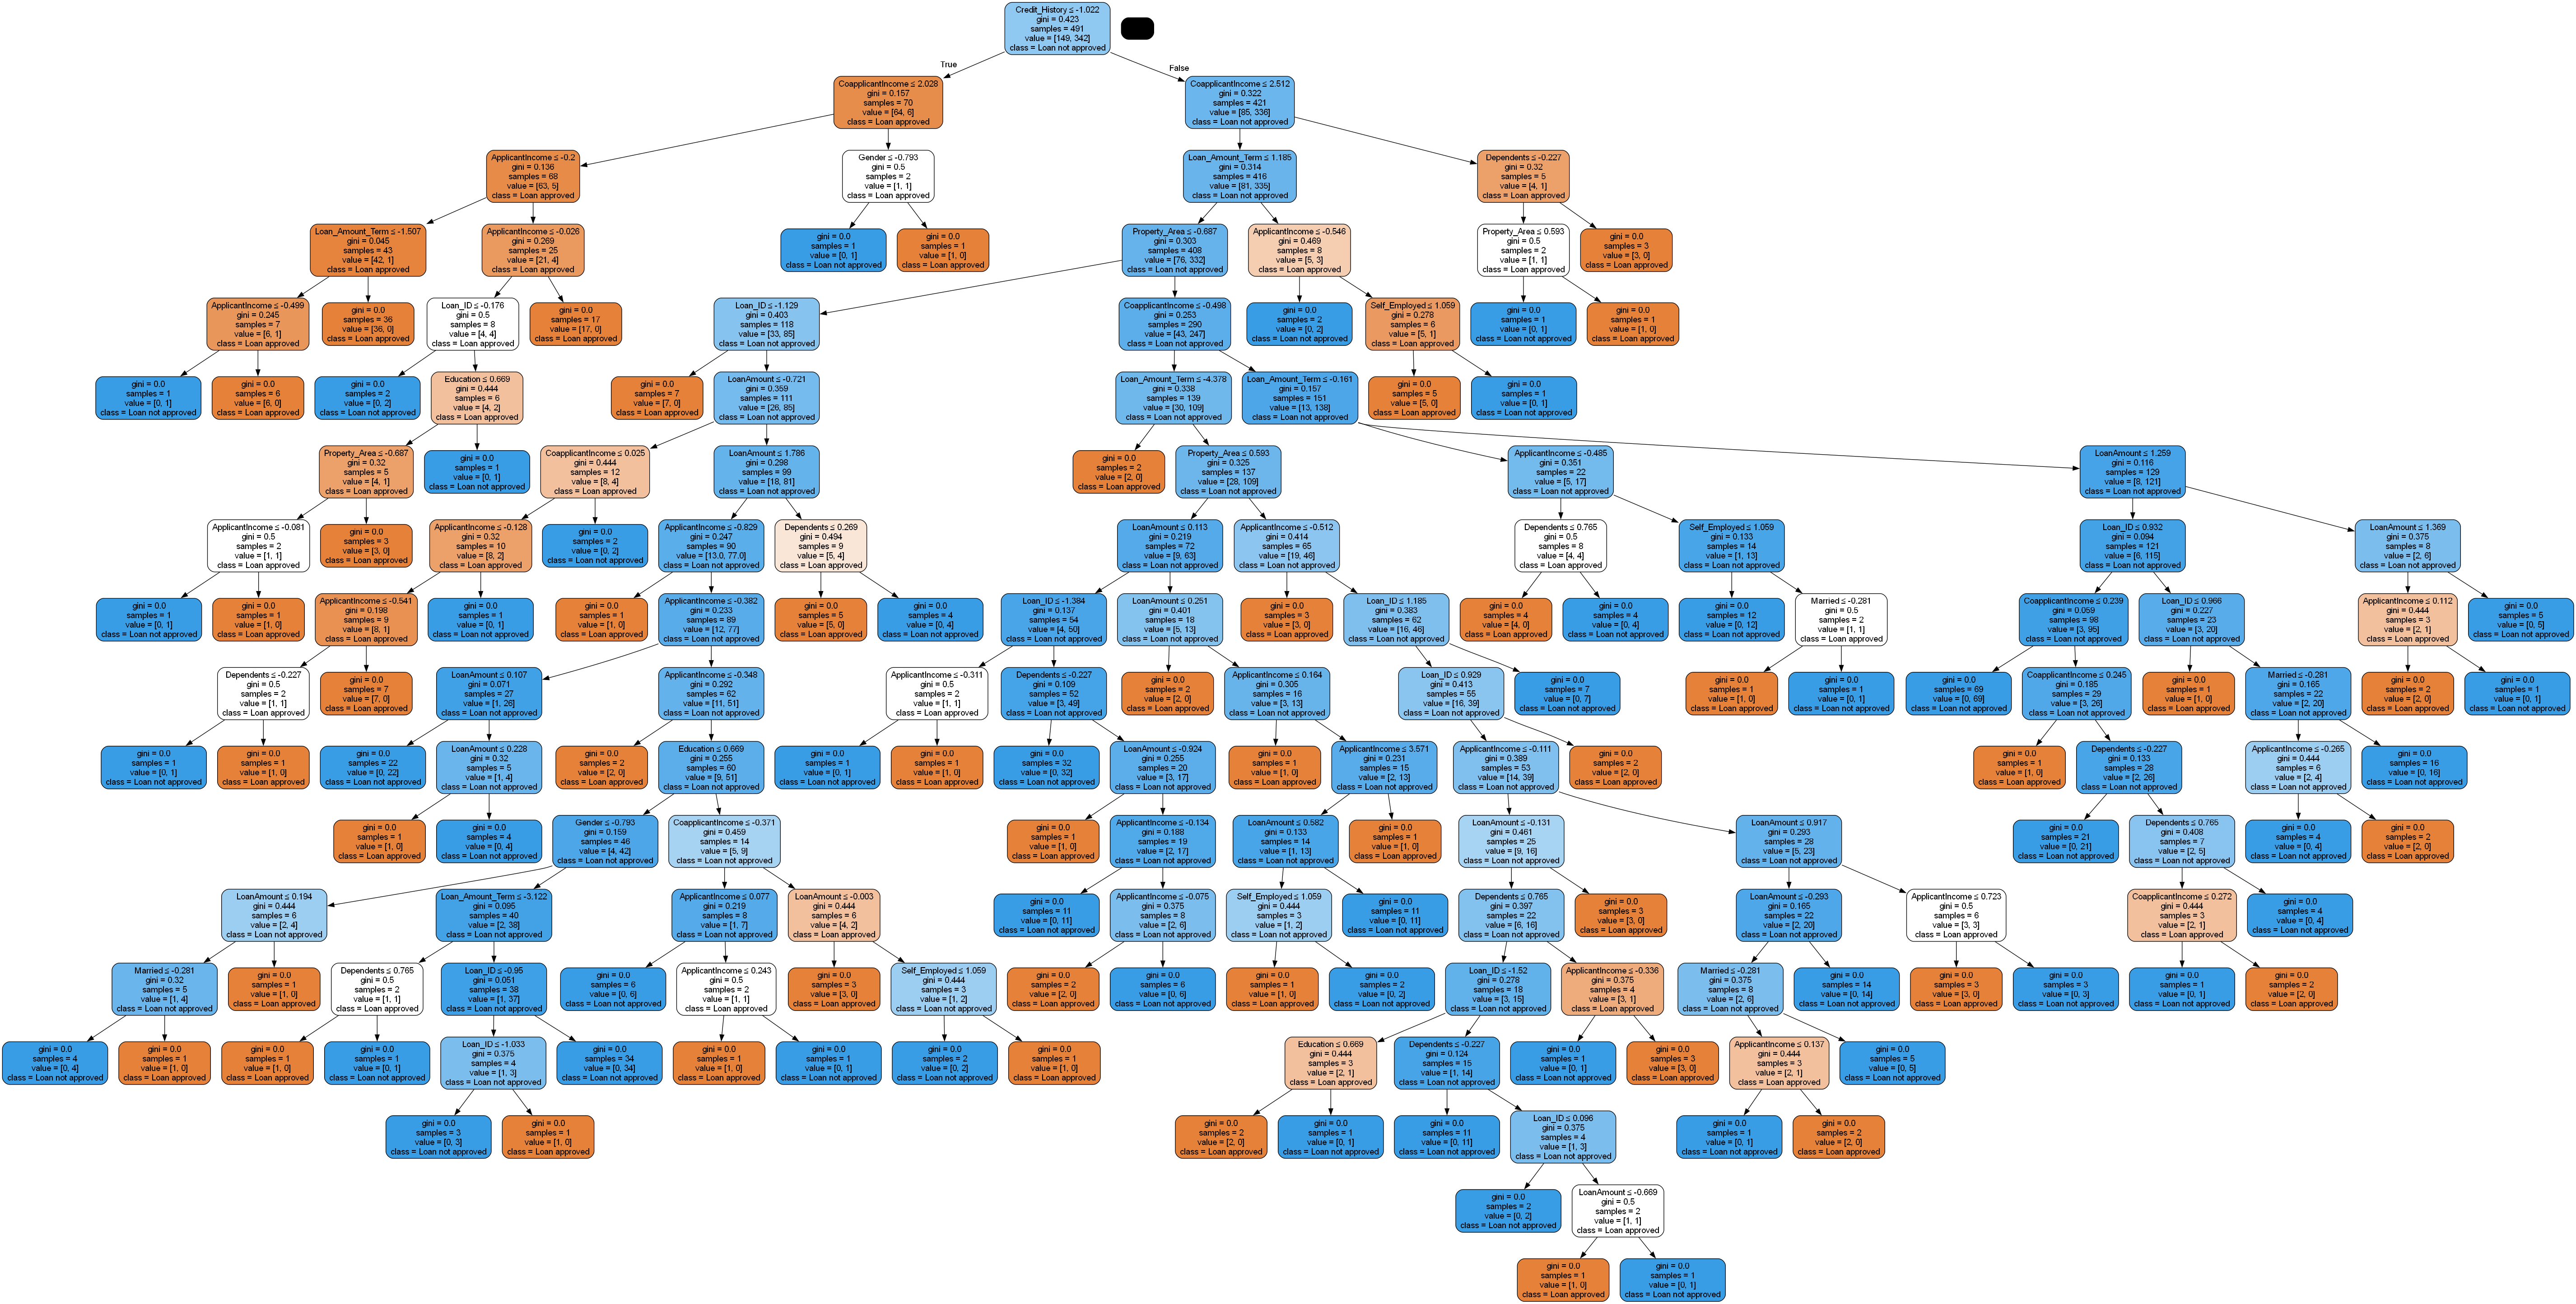

In [30]:
# Graph from decision tree
dot_data = StringIO()
export_graphviz(
    dt_clf,
    out_file=dot_data,
    filled=True, rounded=True, special_characters=True,
    feature_names=X.columns, 
    class_names=target_names
    )
    
# Generate and display the graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('loan.png')
display(Image(filename='loan.png'))